In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [2]:
data = pd.read_csv("/content/newslist_csv.csv", nrows = 1000)
print('전체 뉴스 개수 : ', (len(data)))

전체 뉴스 개수 :  1000


In [3]:
data.head()

,Unnamed: 0,title,url,text
0,1,"결혼 역대 최소 21만건…""코로나·집·일자리...여건 안돼""",http://yna.kr/AKR20210318048000002?did=1195m,곽민서 기자기자 페이지외환위기 후 첫 두자릿수 감소…평균 초혼연령 男 33.2세 女...
1,2,유력 후보 사라졌다…국산 2호 코로나19 치료제 누가 차지하나,http://yna.kr/AKR20210317183900017?did=1195m,"김잔디 기자기자 페이지GC녹십자, 1분기 내 데이터 정리 마치고 4월 허가 신청 예..."
2,3,"CGV, 다음달 2일부터 관람료 또 인상…“코로나 장기화로 불가피”",http://news.kbs.co.kr/news/view.do?ncd=5141991...,업계 1위 멀티플렉스 극장 CGV가 다음달 영화 관람료를 또 인상합니다. 지난해 1...
3,4,"[속보] 코로나19 어제 445명 신규확진…백신 접종 총 641,331명",https://news.sbs.co.kr/news/endPage.do?news_id...,국내 코로나19 확산세가 이어지는 가운데 오늘(18일) 신규 확진자 수는 400...
4,5,"'또 인상' 영화 관람료, 1만4000원 시대…CGV ""코로나19 탓""",http://news.mk.co.kr/newsRead.php?no=257925&ye...,정부는 국내 신종 코로나바이러스 감염증(코로나19) `3차 대유행`이 완만한 감소세...


In [4]:
data = data[['title', 'text']]
data.head()

,title,text
0,"결혼 역대 최소 21만건…""코로나·집·일자리...여건 안돼""",곽민서 기자기자 페이지외환위기 후 첫 두자릿수 감소…평균 초혼연령 男 33.2세 女...
1,유력 후보 사라졌다…국산 2호 코로나19 치료제 누가 차지하나,"김잔디 기자기자 페이지GC녹십자, 1분기 내 데이터 정리 마치고 4월 허가 신청 예..."
2,"CGV, 다음달 2일부터 관람료 또 인상…“코로나 장기화로 불가피”",업계 1위 멀티플렉스 극장 CGV가 다음달 영화 관람료를 또 인상합니다. 지난해 1...
3,"[속보] 코로나19 어제 445명 신규확진…백신 접종 총 641,331명",국내 코로나19 확산세가 이어지는 가운데 오늘(18일) 신규 확진자 수는 400...
4,"'또 인상' 영화 관람료, 1만4000원 시대…CGV ""코로나19 탓""",정부는 국내 신종 코로나바이러스 감염증(코로나19) `3차 대유행`이 완만한 감소세...


In [5]:
print('title 열에서 중복을 배제한 샘플의 수 : ', data['title'].nunique())
print('text 열에서 중복을 배제한 샘플의 수 : ', data['text'].nunique())

title 열에서 중복을 배제한 샘플의 수 :  967
text 열에서 중복을 배제한 샘플의 수 :  933


In [6]:
# text열에서 중복 제거
data.drop_duplicates(subset=['text'], inplace = True)
print("전체 샘플 수 : ", len(data))

전체 샘플 수 :  934


In [7]:
# null 값이 있는 지 확인
print(data.isnull().sum())

title    0
text     1
dtype: int64


In [8]:
data.dropna(axis=0, inplace=True)
print('전체 샘플 수 : ', (len(data)))

전체 샘플 수 :  933


In [9]:
# 불용어 txt 파일 불러오기
text_file = open("/content/stop_words_file.txt", 'r')

# txt 파일에서 \n 제거하여 list로 저장
stop_words = [line.rstrip() for line in text_file]

In [10]:
print("불용어 개수 : ", len(stop_words))
print(stop_words)

불용어 개수 :  675
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하

In [11]:
def preprocess_sentence(sentence, remove_stopwords = True):
  sentence = BeautifulSoup(sentence, "lxml").text   # html 태그 제거
  sentence = re.sub(r'\([^)]*\)', '', sentence)   # 괄호로 닫힌 문자열 제거
  sentence = re.sub('"','', sentence)   # 쌍 따옴표 제거
  sentence = re.sub('[^A-Za-z0-9가-힣]', ' ', sentence)   # 특수문자 제거
  sentence = re.sub('[ㄱ-ㅎ|ㅏ-ㅣ]', '', sentence)   # 자음, 모음 제거
  sentence = re.sub('(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-.\]+.\[a-zA-Z0-9-.\])', '', sentence)   # e-mail 제거

  if remove_stopwords:
    tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1 )
  else:
    tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
  return tokens

In [12]:
temp_title = '결혼 역대 최소 21만건…"코로나·집·일자리...여건 안돼"'
temp_text = ' (도쿄 AP=연합뉴스) 스가 요시히데 일본 총리가 18일 도쿄 총리관저에서 기자회견을 하고 있다. 스가 총리는 이 자리에서 신종 코로나바이러스 감염증(코로나19) 확산 억제를 위해 도쿄 등 수도권 일부 지역에 발효 중인 긴급사태를 이달 21일 전면 해제하기로 결정했다고 밝혔다. 이에 따라 올해 1월 8일 재발효한 일본의 긴급사태는 73일간 유지된 후 종료한다.  leekm@yna.co.kr'
print(preprocess_sentence(temp_title))
print(preprocess_sentence(temp_text))

결혼 역대 최소 21만건 코로나 일자리 여건 안돼
스가 요시히데 일본 총리가 18일 도쿄 총리관저에서 기자회견을 하고 스가 총리는 자리에서 신종 코로나바이러스 감염증 확산 억제를 위해 도쿄 수도권 일부 지역에 발효 중인 긴급사태를 이달 21일 전면 해제하기로 결정했다고 밝혔다 이에 올해 1월 8일 재발효한 일본의 긴급사태는 73일간 유지된 종료한다 leekm yna co kr


In [15]:
# text의 5개 열을 전처리
clean_text = []
for s in data['text']:
  clean_text.append(preprocess_sentence(s))
clean_text[:5]

['곽민서 기자기자 페이지외환위기 두자릿수 감소 평균 초혼연령 33 2세 30 8세 10년새 9세 이혼은 3년 만에 감소 결혼기간 20년 황혼이혼 증가텅 예식장 독자 제공 재판매 DB 금지 곽민서 기자 지난해 결혼 건수가 23년 만에 자릿수 감소율을 기록하며 역대 최소 기록을 갈아치웠다 결혼은 필수가 아닌 선택이라는 인식이 확산하는 데다 코로나19 여파로 결혼 여건도 나빠졌기 때문으로 풀이된다 전체 이혼은 소폭 줄었으나 20년 부부들의 황혼이혼 늘었다 지난해 결혼 21 4만건 20만건 붕괴도 코앞 광고 18일 통계청이 발표한 2020년 혼인 이혼 통계 따르면 지난해 혼인 건수는 21만4천건으로 1년 전보다 10 감소했다 이는 관련 통계 작성이 시작된 1970년 최소치다 감소율은 1971년에 이어 번째로 높았다 두자릿수 감소율은 외환위기 시절인 1997년 이후 23년 만에 처음이다 이로써 혼인 건수는 2012년 이후 9년 연속 감소를 기록했다 1996년까지만 해도 43만건에 달했던 혼인 건수는 1997년 외환위기를 거치며 30만건대로 떨어진 2016년 20만건대까지 추락했고 이제는 10만건대 진입을 코앞에 두고 인구 1천명 혼인 건수를 뜻하는 조혼인율은 2건으로 전년 대비 5건 줄면서 역시 사상 최저치를 기록했다 김수영 통계청 인구동향과장은 코로나19로 결혼이 많이 연기되거나 취소된 가운데 최근 결혼 연령층인 30대 인구가 줄어드는 추세로 주거나 고용 결혼 여건도 어려워지며 만혼 비혼이 증가하고 있다고 설명했다 이어 결혼에 대한 긍정적 인식 가치관도 점차 변화하는 추세라고 덧붙였다 통계청이 지난해 발표한 2020년 사회조사 따르면 결혼을 해야 한다 거나 하는 것이 좋다 생각하는 사람은 조사 대상의 51 그쳤다 이는 2010년과 비교해 10년새 14 포인트가량 감소한 수준이다 통계청 제공 재판매 db 금지 남성의 경우 30대 초반 여성은 20대 후반에 결혼을 하는 경우가 많았다 연령별 혼인율을 보면 남자는 30대 초반이 47 6건 여자는 20대 후반이 44 9건으

In [13]:
# title의 5개 열을 전처리
clean_title = []
for s in data['title']:
  clean_title.append(preprocess_sentence(s, 0))
clean_title[:5]

['결혼 역대 최소 21만건 코로나 일자리 여건 안돼',
 '유력 후보 사라졌다 국산 2호 코로나19 치료제 누가 차지하나',
 'CGV 다음달 2일부터 관람료 인상 코로나 장기화로 불가피',
 '속보 코로나19 어제 445명 신규확진 백신 접종 641 331명',
 '인상 영화 관람료 1만4000원 시대 CGV 코로나19']

In [16]:
# 전처리한 데이터를 데이터프레임에 저장
data['text'] = clean_text
data['title'] = clean_title

In [17]:
# 전처리 과정에서 빈 값이 생겼다면, null로 변경하여 출력
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

title    0
text     1
dtype: int64


In [18]:
data.dropna(axis = 0, inplace = True)
print('전체 샘플 수 : ', (len(data)))

전체 샘플 수 :  932


텍스트의 최소 길이 : 13
텍스트의 최대 길이 : 1460
텍스트의 평균 길이 : 204.39377682403435
제목의 최소 길이 : 2
제목의 최대 길이 : 15
제목의 평균 길이 : 6.977467811158799


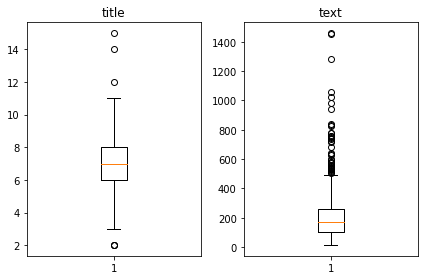

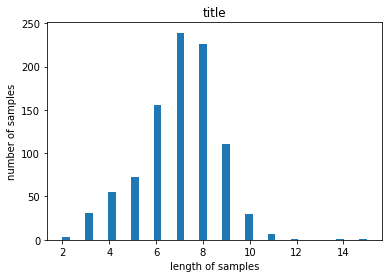

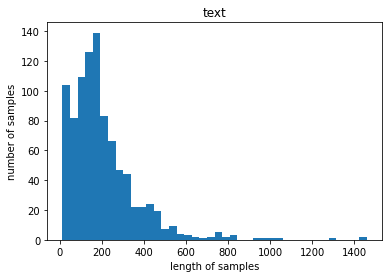

In [20]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['text']]
title_len = [len(s.split()) for s in data['title']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('제목의 최소 길이 : {}'.format(np.min(title_len)))
print('제목의 최대 길이 : {}'.format(np.max(title_len)))
print('제목의 평균 길이 : {}'.format(np.mean(title_len)))

plt.subplot(1,2,1)
plt.boxplot(title_len)
plt.title('title')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('title')
plt.hist(title_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
text_max_len = 400
title_max_len = 10

In [22]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s'%(max_len, (cnt / len(nested_list))))

In [23]:
below_threshold_len(text_max_len, data['text'])

전체 샘플 중 길이가 400 이하인 샘플의 비율 : 0.898068669527897


In [27]:
below_threshold_len(title_max_len, data['title'])

전체 샘플 중 길이가 10 이하인 샘플의 비율 : 0.9892703862660944


In [28]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['title'].apply(lambda x: len(x.split()) <= title_max_len)]
print('전체 샘플 수 : ', (len(data)))

전체 샘플 수 :  829


In [29]:
data.head()

,title,text
1,유력 후보 사라졌다 국산 2호 코로나19 치료제 누가 차지하나,김잔디 기자기자 페이지GC녹십자 1분기 데이터 정리 마치고 4월 허가 신청 예정 김...
2,CGV 다음달 2일부터 관람료 인상 코로나 장기화로 불가피,업계 1위 멀티플렉스 극장 CGV가 다음달 영화 관람료를 인상합니다 지난해 10월 ...
3,속보 코로나19 어제 445명 신규확진 백신 접종 641 331명,국내 코로나19 확산세가 이어지는 가운데 오늘 신규 확진자 수는 400명대 중반을 ...
4,인상 영화 관람료 1만4000원 시대 CGV 코로나19,정부는 국내 신종 코로나바이러스 감염증 3차 대유행 완만한 감소세에 접어들었지만 확...
6,EU 코로나19 백신 수출 차단 위협 영국 벼랑끝 전술이냐,최윤정 기자기자 페이지영국서 EU로 오는 아스트라제네카 백신 부족 언급 영국 계약은...


In [31]:
data['decoder_input'] = data['title'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['title'].apply(lambda x : x + ' eostoken')
data.head()

,title,text,decoder_input,decoder_target
1,유력 후보 사라졌다 국산 2호 코로나19 치료제 누가 차지하나,김잔디 기자기자 페이지GC녹십자 1분기 데이터 정리 마치고 4월 허가 신청 예정 김...,sostoken 유력 후보 사라졌다 국산 2호 코로나19 치료제 누가 차지하나,유력 후보 사라졌다 국산 2호 코로나19 치료제 누가 차지하나 eostoken
2,CGV 다음달 2일부터 관람료 인상 코로나 장기화로 불가피,업계 1위 멀티플렉스 극장 CGV가 다음달 영화 관람료를 인상합니다 지난해 10월 ...,sostoken CGV 다음달 2일부터 관람료 인상 코로나 장기화로 불가피,CGV 다음달 2일부터 관람료 인상 코로나 장기화로 불가피 eostoken
3,속보 코로나19 어제 445명 신규확진 백신 접종 641 331명,국내 코로나19 확산세가 이어지는 가운데 오늘 신규 확진자 수는 400명대 중반을 ...,sostoken 속보 코로나19 어제 445명 신규확진 백신 접종 641 331명,속보 코로나19 어제 445명 신규확진 백신 접종 641 331명 eostoken
4,인상 영화 관람료 1만4000원 시대 CGV 코로나19,정부는 국내 신종 코로나바이러스 감염증 3차 대유행 완만한 감소세에 접어들었지만 확...,sostoken 인상 영화 관람료 1만4000원 시대 CGV 코로나19,인상 영화 관람료 1만4000원 시대 CGV 코로나19 eostoken
6,EU 코로나19 백신 수출 차단 위협 영국 벼랑끝 전술이냐,최윤정 기자기자 페이지영국서 EU로 오는 아스트라제네카 백신 부족 언급 영국 계약은...,sostoken EU 코로나19 백신 수출 차단 위협 영국 벼랑끝 전술이냐,EU 코로나19 백신 수출 차단 위협 영국 벼랑끝 전술이냐 eostoken


In [32]:
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

### 데이터 분리

In [33]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[826 103   8 258 627 356 294 656 520 316 432 671 538 678 712  14 270 532
 665 742 691 200 252 395 113 701  27 604 814 504 474 465 222 399 363 331
 408 210 646 338 145  55 636  77 601 720 805 272 749 568 584 255 379 733
 156 101 489 467 549 818 193  31 344 496 310 416 688 492 456 367  40 283
 732 553 612 762 241 235 204 240  79 285 162 499 346 236 278 306 751 317
 319 462  85  75 653 345 783 484   1 351   5 150 716 231 308 141 364 789
 743 578 352 428 798 390 299 293 481 825 676 576 230 643 412 506 634 142
 452 530 261 779 822  39  18 239 725 603  50 795 602 122 466 361  10 439
  68 482 266 658 592 401 686 172   2 821 809 693 644 494 776 765 425 251
 531 750 669 279 447 782  71  49 267 175 116  37 242  48 215 451 817 563
 479 409  76  64 661  52 358 402 253 493 546 271  34 566 196 202 118  12
 157 263 761 249 354 181 657  97 577 614 683 801 794 491 406 386 571 475
 648 312 545 362  17 334 753 588 458 441 650 403 350 487 760 685 792 170
 187 747 247  45 608 374  62  78 413 746 320 140 19

In [34]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [35]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 165


In [36]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [37]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 664
훈련 레이블의 개수 : 664
테스트 데이터의 개수 : 165
테스트 레이블의 개수 : 165


### 정수 인코딩

In [38]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [40]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기 : 36221
등장 빈도가 6번 이하인 희귀 단어의 수: 33730
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2491
단어 집합에서 희귀 단어의 비율: 93.12277408133404
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 49.203348885241674


In [41]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [42]:
print(encoder_input_train[:3])

[[37, 657, 885, 394, 214, 365, 2103, 704, 7338, 1800, 32, 3816, 365, 19, 3068, 54, 502, 5071, 566, 3069, 7339, 658, 159, 2104, 64, 75, 23, 609, 365, 705, 20, 342, 13, 885, 394, 706, 7340, 752, 3817, 195, 2104, 7341, 7342, 827, 394, 706, 3070, 7343, 118, 7344, 343, 1274, 394, 885, 7345, 959, 7, 886, 7346, 2492, 394, 1403, 2493, 5072, 7346, 2494, 394, 827, 3818, 566, 503, 47, 2495, 2496, 7347, 1275, 960, 67, 2104, 32, 1276, 118, 19, 3068, 54, 502, 5071, 37, 268, 1277, 1801, 706, 1041, 292, 7348, 659, 3070, 1802, 1154, 1042, 2104, 365, 5073, 394, 174, 55, 3071, 7349, 961, 2497, 2498, 7350, 20, 161, 7351, 7352, 1275, 167, 1585, 20, 7353, 2499, 7354, 828, 366, 97, 3819, 101, 887, 2104, 7348, 502, 3071, 20, 885, 394, 7355, 1586, 1803, 195, 293, 394, 5074, 753, 1587, 888, 1043, 707, 754, 7356, 2500, 13, 7357, 394, 2501, 1804, 1404, 395, 2104, 118, 394, 7344, 343, 962, 3820, 7358, 161, 2501, 458, 3821, 5075, 459, 5076, 3820, 7358, 440, 2104, 7341, 7342, 827, 394, 885, 706, 3070, 7343, 963, 735

In [43]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [44]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기 : 2765
등장 빈도가 5번 이하인 희귀 단어의 수: 2693
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 72
단어 집합에서 희귀 단어의 비율: 97.39602169981917
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 68.51923076923076


In [45]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [46]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [47]:
print(decoder_input_train[:5])

[[1, 616, 54, 617, 618, 619, 9, 620], [1, 621, 44, 622, 74, 623, 624, 625, 626], [1, 164, 28, 285, 627, 10, 165, 628, 629], [1, 3, 286, 20, 55, 101, 75], [1, 630, 287, 4, 631, 632, 633]]


In [48]:
print(decoder_target_train[:5])

[[616, 54, 617, 618, 619, 9, 620, 2], [621, 44, 622, 74, 623, 624, 625, 626, 2], [164, 28, 285, 627, 10, 165, 628, 629, 2], [3, 286, 20, 55, 101, 75, 2], [630, 287, 4, 631, 632, 633, 2]]


In [49]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [50]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 5
삭제할 테스트 데이터의 개수 : 2


In [51]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 659
훈련 레이블의 개수 : 659
테스트 데이터의 개수 : 163
테스트 레이블의 개수 : 163


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [53]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen =  title_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = title_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = title_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = title_max_len, padding='post')

### seq2seq + attention으로 요약 모델 설계 및 훈련시키기

In [54]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [55]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [56]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [57]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 128)     1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 400, 256), ( 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [58]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [59]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 128)     1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 400, 256), ( 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [60]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [61]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
3/3 [==============================] - 155s 48s/step - loss: 7.4028 - val_loss: 3.2481
Epoch 2/50
3/3 [==============================] - 146s 45s/step - loss: 5.1098 - val_loss: 3.4480
Epoch 3/50
3/3 [==============================] - 134s 43s/step - loss: 4.8339 - val_loss: 2.8595
Epoch 4/50
3/3 [==============================] - 135s 43s/step - loss: 4.6287 - val_loss: 3.3408
Epoch 5/50
3/3 [==============================] - 141s 47s/step - loss: 4.6882 - val_loss: 2.8019
Epoch 6/50
3/3 [==============================] - 134s 43s/step - loss: 4.5955 - val_loss: 3.0733
Epoch 7/50
3/3 [==============================] - 135s 43s/step - loss: 4.4903 - val_loss: 2.9023
Epoch 00007: early stopping


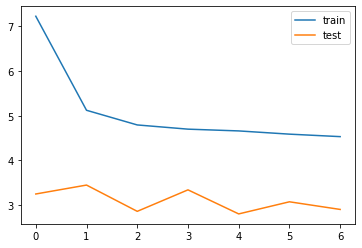

In [62]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### seq2seq + attention으로 요약 모델 테스트하기

In [64]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [65]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [66]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [67]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [85]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [78]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

In [92]:
for i in range(1, 10):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    #print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  포인트 서비스 사진 제공 휴대폰 멤버십 포인트 가능한 포인트 서비스 2일 밝혔다 포인트 서비스는 별도의 애플리케이션 없이 고객이 휴대폰 입력하면 멤버십 전국 사용할 카카오톡 링크를 카카오톡 기반으로 가입할 특히 해당 서비스는 자체 개발한 것으로 별도의 프로그램 설치 없이 기존 없다 2018년 멤버십 이를 기반으로 결제 할인 등을 있는 서비스를 제공하고 멤버십 포인트 업계 최고 수준이다 사용해 상품을 등에 있으며 수도 고객들이 없이 업계 최대 수준의 혜택을 누릴 있도록 해당 서비스를 됐다며 앞으로도 앱과 잇는 서비스를 확대해 고객들의 있는 다양한 서비스를 선보일 것이라고 말했다 신미진 기자 mjshin mkinternet com 매일경제 mk co kr 무단전재 재배포 금지 
실제 요약문 : 휴대폰 


원문 :  장보인 기자기자 페이지 14일 전적 21 득점 광고 2021 03 14 20 34 송고 
실제 요약문 : 프로축구2부 


원문 :  수천만 원의 30대가 부산 컴퓨터 사용 사기 혐의로 30대 a씨를 오늘 밝혔습니다 a씨는 올해 1월부터 부산 사장 b씨 휴대전화를 원을 혐의를 받고 있습니다 그는 같은 경남 일대 상대로 걸쳐 원을 것으로 a씨는 주로 인터넷 것으로 피해자 명의로 현금으로 요구하는 보였습니다 경찰은 않은 a씨를 대전 
실제 요약문 : 휴대폰 


원문 :  채새롬 기자기자 100만 달러 이하 높은 비판 돌파 중소 지원 프로그램 발표 애플 제공 재판매 db 금지 채새롬 기자 애플이 내년부터 세계 중소 자사 앱스토어 유료 앱과 인앱결제 관련 수수료를 기존 30 15 결정은 결제 수수료 30 모든 콘텐츠로 끈다 애플은 내년 1월 1일 새로운 앱스토어 중소 규모 지원 프로그램을 18일 밝혔다 따르면 올해 100만 달러 15 앱스토어 수수료를 된다 개발자 기본 30 광고 수수료 100만 달러 이상인 경우 앱스토어 30 그대로 업계에서는 최근 앱스토어 계기로 애플 구글 위에 애플이 같은 위해 보고 애플은 코로나19 인한 경제 위기 위해 프